## Experimental Results for Geospatial & Environmental Model 

In [1]:
## Import libraries 
import os

import pandas as pd
import numpy as np

from scipy import sparse

from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context("paper", font_scale=1.5)

In [2]:
# define functions 
def mean_absolute_percentage_error(y_true,y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Read Data 

In [3]:
## Read All data 
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/geo_env_model')

## Load Columns 
columns = pd.read_csv('columns.csv').rename(columns={'0':'feature'})

## Read Test Set 
X_test = sparse.load_npz('test/X_test.npz')
y_test = pd.read_hdf('test/y_test.hdf', key='test')

## Load Model 

In [4]:
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/models/geo_env_model')

## Load Model 
gbm = pickle.load(open('model.sav', 'rb'))
# Make predictions on test set 
y_pred_test = gbm.predict(X_test)

/Users/Ailyra/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Visualize Feature Importance

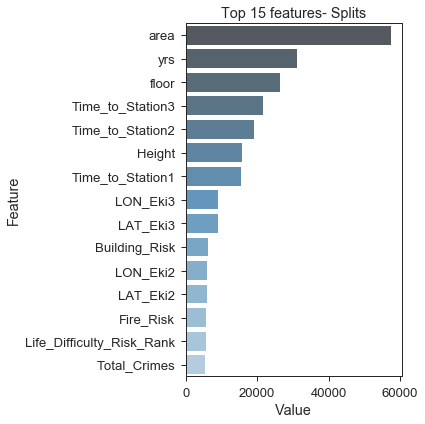

In [5]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Splits')

plt.tight_layout()

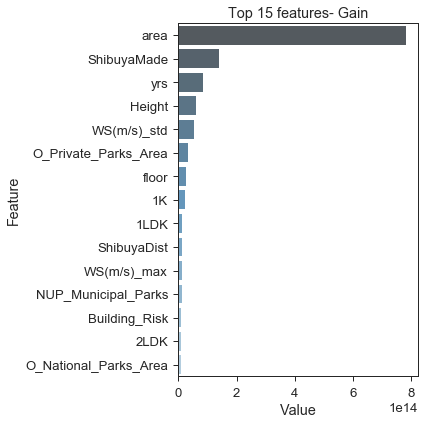

In [6]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(importance_type='gain'),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Gain')

plt.tight_layout()

In [7]:
## Need to make code that writes a file for this at the end
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/postproc')
postproc = pd.read_csv('tokyo_postproc.csv')

In [8]:
## Combine Test Predictions and Actuals 
testframe = pd.DataFrame({'pred':y_pred_test,'actual':y_test})
testframe['residuals'] = testframe.pred - testframe.actual
testframe = pd.merge(testframe, postproc, left_index=True,right_index=True)
testframe.head(10)

,pred,actual,residuals,title,location,yrs,floor,rent,deposit,gratuity,...,Car_2,Walk_2,Bus_2,Line_2,Station_2,Car_3,Walk_3,Bus_3,Line_3,Station_3
133746,166923.939874,155000,11923.939874,都営三田線 三田駅 地下1地上10階建 築13年,港区芝４,13,5,147000,1,1,...,NaN,5.0,NaN,ＪＲ山手線,田町駅,NaN,10.0,NaN,都営三田線,芝公園駅
135650,205878.719244,204000,1878.719244,コンフォリア三田ＥＡＳＴ,港区芝４,12,7,194000,1,0,...,NaN,7.0,NaN,ＪＲ山手線,田町駅,NaN,10.0,NaN,都営三田線,芝公園駅
148095,153096.311411,155000,-1903.688589,本芝ビル,港区芝４,13,5,147000,1,1,...,NaN,5.0,NaN,ＪＲ山手線,田町駅,NaN,11.0,NaN,都営三田線,芝公園駅
150852,247996.733550,260000,-12003.266450,名倉堂ビル,港区芝４,16,3,260000,1,1,...,NaN,6.0,NaN,ＪＲ山手線,田町駅,NaN,15.0,NaN,都営大江戸線,赤羽橋駅
156674,114493.424850,115000,-506.575150,シャリオ本芝,港区芝４,13,4,109000,1,1,...,NaN,3.0,NaN,ＪＲ山手線,田町駅,NaN,NaN,NaN,No_Line_3,No_Station_3
137352,115266.476775,115000,266.476775,パレステュディオ三田,港区芝４,16,11,105000,1,1,...,NaN,3.0,NaN,都営三田線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅
139754,164334.065779,175000,-10665.934221,コンフォリア三田イースト,港区芝４,12,13,165000,1,0,...,NaN,5.0,NaN,都営浅草線,三田駅,NaN,5.0,NaN,都営三田線,三田駅
142769,129711.281782,132000,-2288.718218,ＪＲ山手線 田町駅 地下1地上13階建 築12年,港区芝４,12,3,125000,1,0,...,NaN,5.0,NaN,都営浅草線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅
150683,113827.457064,105000,8827.457064,メインステージ三田アーバンスクエア,港区芝４,6,5,93000,0,1,...,NaN,2.0,NaN,都営三田線,三田駅,NaN,13.0,NaN,ＪＲ山手線,浜松町駅
155753,150245.895663,149000,1245.895663,パレステュディオ三田,港区芝４,16,13,139000,1,1,...,NaN,3.0,NaN,都営三田線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅


In [9]:
## Rebin values
testframe['targetbins'] = pd.qcut(testframe['target'],15)

## Analysis by Price Bin 

In [10]:
## MAPE/RMSE BINS 
bins = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['targetbins'].sort_values().unique():
    binnedtarget = testframe[testframe['targetbins'] == i]
    MAPE = mean_absolute_percentage_error(binnedtarget['actual'],binnedtarget['pred'])
    RMSE = np.sqrt(mean_squared_error(binnedtarget['actual'], binnedtarget['pred']))
    print(i, MAPE, RMSE)
    bins.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
SCORESDF = pd.DataFrame({'price_bins':bins,'MAPE':MAPEscores,'RMSE':RMSEscores})

(23999.999, 53000.0] 9.3814267215968 6121.480361898836
(53000.0, 60000.0] 6.151230524827698 5073.600499939977
(60000.0, 66000.0] 5.668213251152827 5171.242988373655
(66000.0, 72000.0] 5.208208534623907 5532.904202635528
(72000.0, 77000.0] 5.333532377180904 5895.4483879411355
(77000.0, 82500.0] 5.257247863373197 6343.351387145662
(82500.0, 88000.0] 5.115611035592178 6668.3311336462475
(88000.0, 95000.0] 5.176568756446338 7831.134309391169
(95000.0, 102000.0] 4.622842032907856 7112.212796917424
(102000.0, 110000.0] 4.6562708951688 7506.5347643588575
(110000.0, 121000.0] 4.12837175617325 7548.298943593268
(121000.0, 135000.0] 4.421070102839938 9097.603699293439
(135000.0, 155000.0] 4.68771530902386 10939.92541380336
(155000.0, 203000.0] 5.007164138910562 15569.158312333848
(203000.0, 790000.0] 5.632531049663033 32063.83360579447


(0, 10.5)

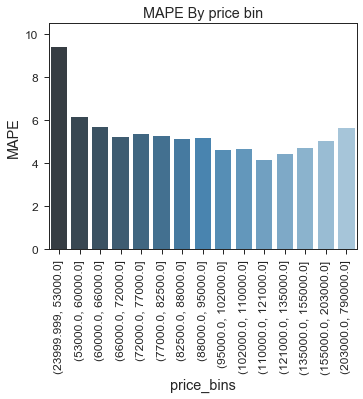

In [11]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['MAPE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('MAPE By price bin')
plt.ylim(0,10.5)

(0, 35000)

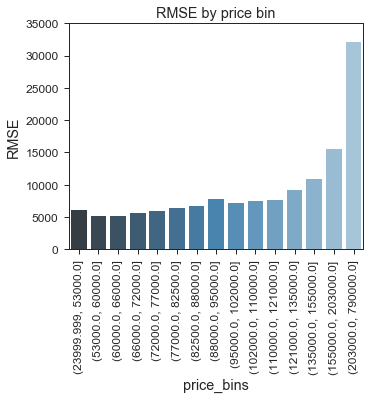

In [12]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['RMSE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('RMSE by price bin')
plt.ylim(0,35000)

## Analysis by Ku 

In [13]:
## MAPE/RMSE BINS 
Kulist = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['Ku'].unique():
    Ku = testframe[testframe['Ku'] == i]
    MAPE = mean_absolute_percentage_error(Ku['actual'],Ku['pred'])
    RMSE = np.sqrt(mean_squared_error(Ku['actual'], Ku['pred']))
    print(i, MAPE, RMSE)
    Kulist.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
KUSCORESDF = pd.DataFrame({'Ku':Kulist,'MAPE':MAPEscores,'RMSE':RMSEscores})

Minato 5.292092963145276 24299.617808933865
Katsushika 5.3469301309380555 6870.072538259565
Setagaya 5.631833452104789 10631.964642452345
Ota 5.397131740239272 8455.129359549088
Meguro 5.182580304139172 15429.411605481577
Suginami 6.368303610298577 9172.39307289629
Sumida 4.9670564138237685 8641.630891936918
Taito 4.6616841751067115 9770.385755144966
Koto 4.238077392436328 8918.73394549514
Shinagawa 4.894491112284448 11035.08157660157
Edogawa 5.424319214003029 7574.156137151064
Kita 5.423528304659519 8366.245905621296
Arakawa 5.513240971392342 8198.484350964938
Bunkyo 5.612004068869947 12144.348574082218
Adachi 5.600033408734497 7914.293690104332
Nakano 5.851490905552557 8705.330272177514
Nerima 4.949585609399665 7846.795765168458
Toshima 5.423590347218086 10877.590865738292
Chiyoda 4.5806362893637935 21938.73490185513
Itabashi 5.210776965594946 6908.710503976171
Chuo 4.979568854454168 19715.154947616436
Shinjuku 5.475039389032423 13338.632149278801
Shibuya 5.488309262001337 15890.3677

In [14]:
## Add Region Coding 
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Itabashi','Kita']),'North_outer',None)
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Nerima','Suginami','Nakano']),'West',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Toshima','Bunkyo']),'North_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Arakawa','Adachi','Katsushika','Edogawa']),'East_outer',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Koto','Taito','Sumida']),'East_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Shibuya','Shinjuku','Minato','Chiyoda','Chuo']),'Central',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Setagaya','Meguro','Shinagawa','Ota']),'South',KUSCORESDF['Region'])

In [15]:
regions= ['North_outer','West','North_inner','East_outer','East_inner','Central','South']

## MAPE by Ku

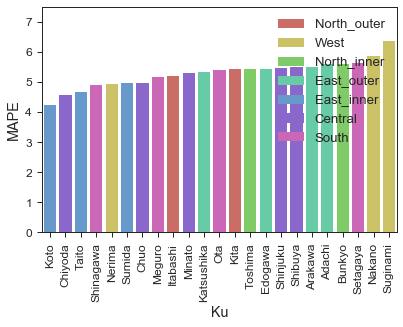

In [16]:
KUSCORESDF = KUSCORESDF.sort_values(by='MAPE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['MAPE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False, palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,7.5)
plt.legend()

## RMSE by Ku

(0, 25000)

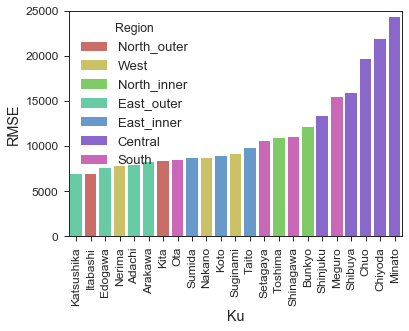

In [17]:
KUSCORESDF = KUSCORESDF.sort_values(by='RMSE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['RMSE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False,palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,25000)